## Usage examples combining GPlatesReconstructionModel with pygmt 

In [1]:
import sys
sys.path.insert(1, r'C:\Users\taschaap\Documents\pygplates_rev28_python38_win64')
sys.path.insert(1, r"C:\Users\taschaap\Documents\Python Scripts\GPlatesReconstructionModel-master\GPlatesReconstructionModel-master")

import pygplates
import pygmt

from gprm import ReconstructionModel

print(pygplates.__version__)

%load_ext autoreload
%autoreload 2

2.2.0.28


C:\Users\taschaap\Documents\Python Scripts\GPlatesReconstructionModel-master\GPlatesReconstructionModel-master\gprm\GPlatesReconstructionModel.py:52: UserWarning: cartopy plotting options not available
  warnings.warn('cartopy plotting options not available')
C:\Users\taschaap\Documents\Python Scripts\GPlatesReconstructionModel-master\GPlatesReconstructionModel-master\gprm\GPlatesReconstructionModel.py:56: UserWarning: web service options not available
  warnings.warn('web service options not available')


In [12]:
T2020 = ReconstructionModel('Tom++2020')
T2020.add_rotation_model(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\Rotation models\Orocline_July20.grot")
T2020.add_rotation_model(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\Rotation models\Phanerozoic_EarthByte_V3.grot")
T2020.add_continent_polygons(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\Global data\Continents_mod2_Seton2012.gpml")
T2020.add_dynamic_polygons(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\sub-zones1.gpml")

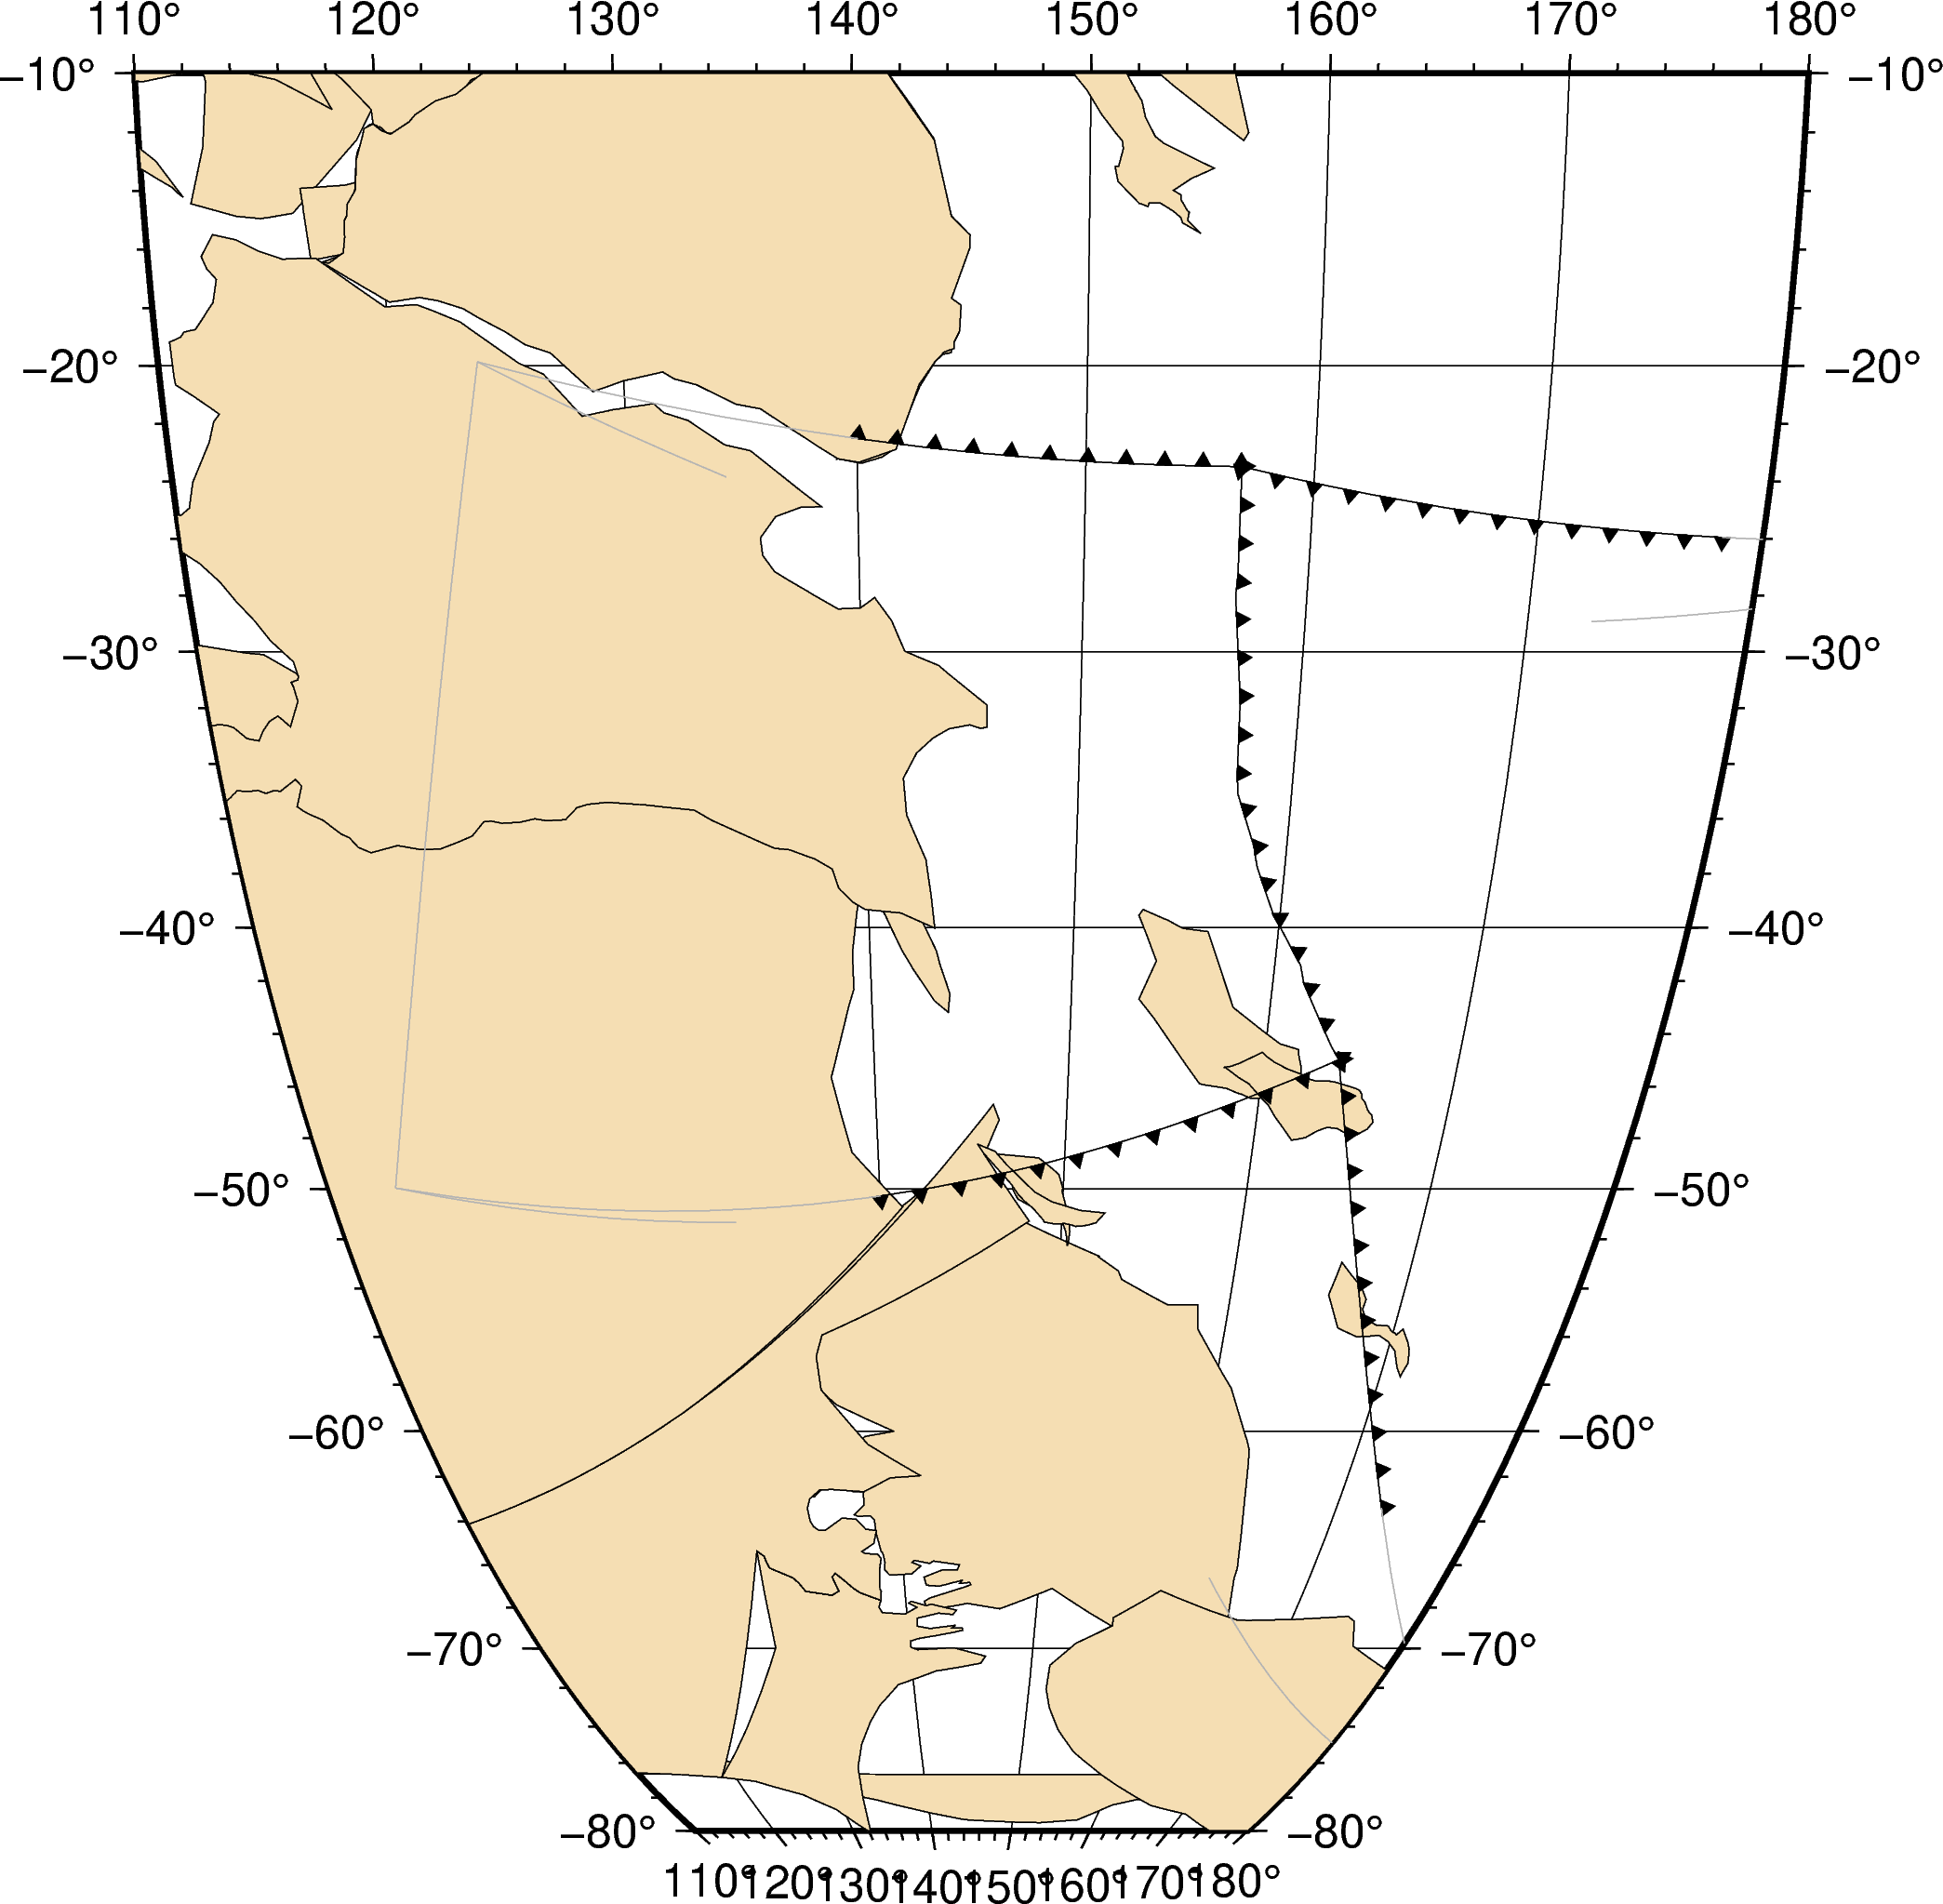

In [13]:
reconstruction_time = 520.
reconstructed_continents = T2020.polygon_snapshot('continents', reconstruction_time, anchor_plate_id = 801)
reconstructed_plates = T2020.plate_snapshot(reconstruction_time, anchor_plate_id = 801)


fig = pygmt.Figure()
fig.basemap(region=[110, 180, -80, -10], projection='W6i', frame='afg')
reconstructed_continents.plot(fig, fill_color='wheat')
reconstructed_plates.plot_subduction_zones(fig)
reconstructed_plates.plot_mid_ocean_ridges(fig)
reconstructed_plates.plot_other_boundaries(fig)
fig.show(width=800)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.cm.magma

min_time = 380.
max_time = 440.
time_step = 5.

def plot_subduction_stack(reconstruction_model, 
                          min_time, max_time, time_step,
                          scale_min_time=None, scale_max_time=None):
    
    if scale_min_time is None:
        scale_min_time = min_time
    if scale_max_time is None:
        scale_max_time = max_time
        
    fig = pygmt.Figure()
    fig.basemap(region=[120, 145, -45, -20], projection='W6i', frame='afg')
    fig.coast(land='lightgray')

    time_list = np.arange(max_time,min_time-time_step,-time_step)
    color_indices = np.linspace((min_time-scale_min_time)/(scale_max_time-scale_min_time),
                                (max_time-scale_min_time)/(scale_max_time-scale_min_time),
                                time_list.shape[0])
        
    for i,reconstruction_time in enumerate(time_list):
        #print(reconstruction_time)
        idx = color_indices[i]
        colors = cmap(1-idx)
        colors = np.array(colors)*255.

        s = reconstruction_model.plate_snapshot(reconstruction_time)
        sz = s.get_boundary_features(['subduction'])

        for szz in sz:
            if szz.get_geometry() is not None:
                data = szz.get_geometry().to_lat_lon_array()
                if szz.get_enumeration(pygplates.PropertyName.gpml_subduction_polarity)=='Left':
                    fig.plot(x=data[:,1],y=data[:,0], style="f10p/4p+l+t", 
                             pen='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]),
                             color='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]))
                elif szz.get_enumeration(pygplates.PropertyName.gpml_subduction_polarity)=='Right':
                    fig.plot(x=data[:,1],y=data[:,0], style="f10p/4p+r+t",
                             pen='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]),
                             color='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]))

    fig.basemap(region=[120, 145, -45, -20], projection='W6i', frame='afg')
    #fig.show(width=800)
    return fig
    

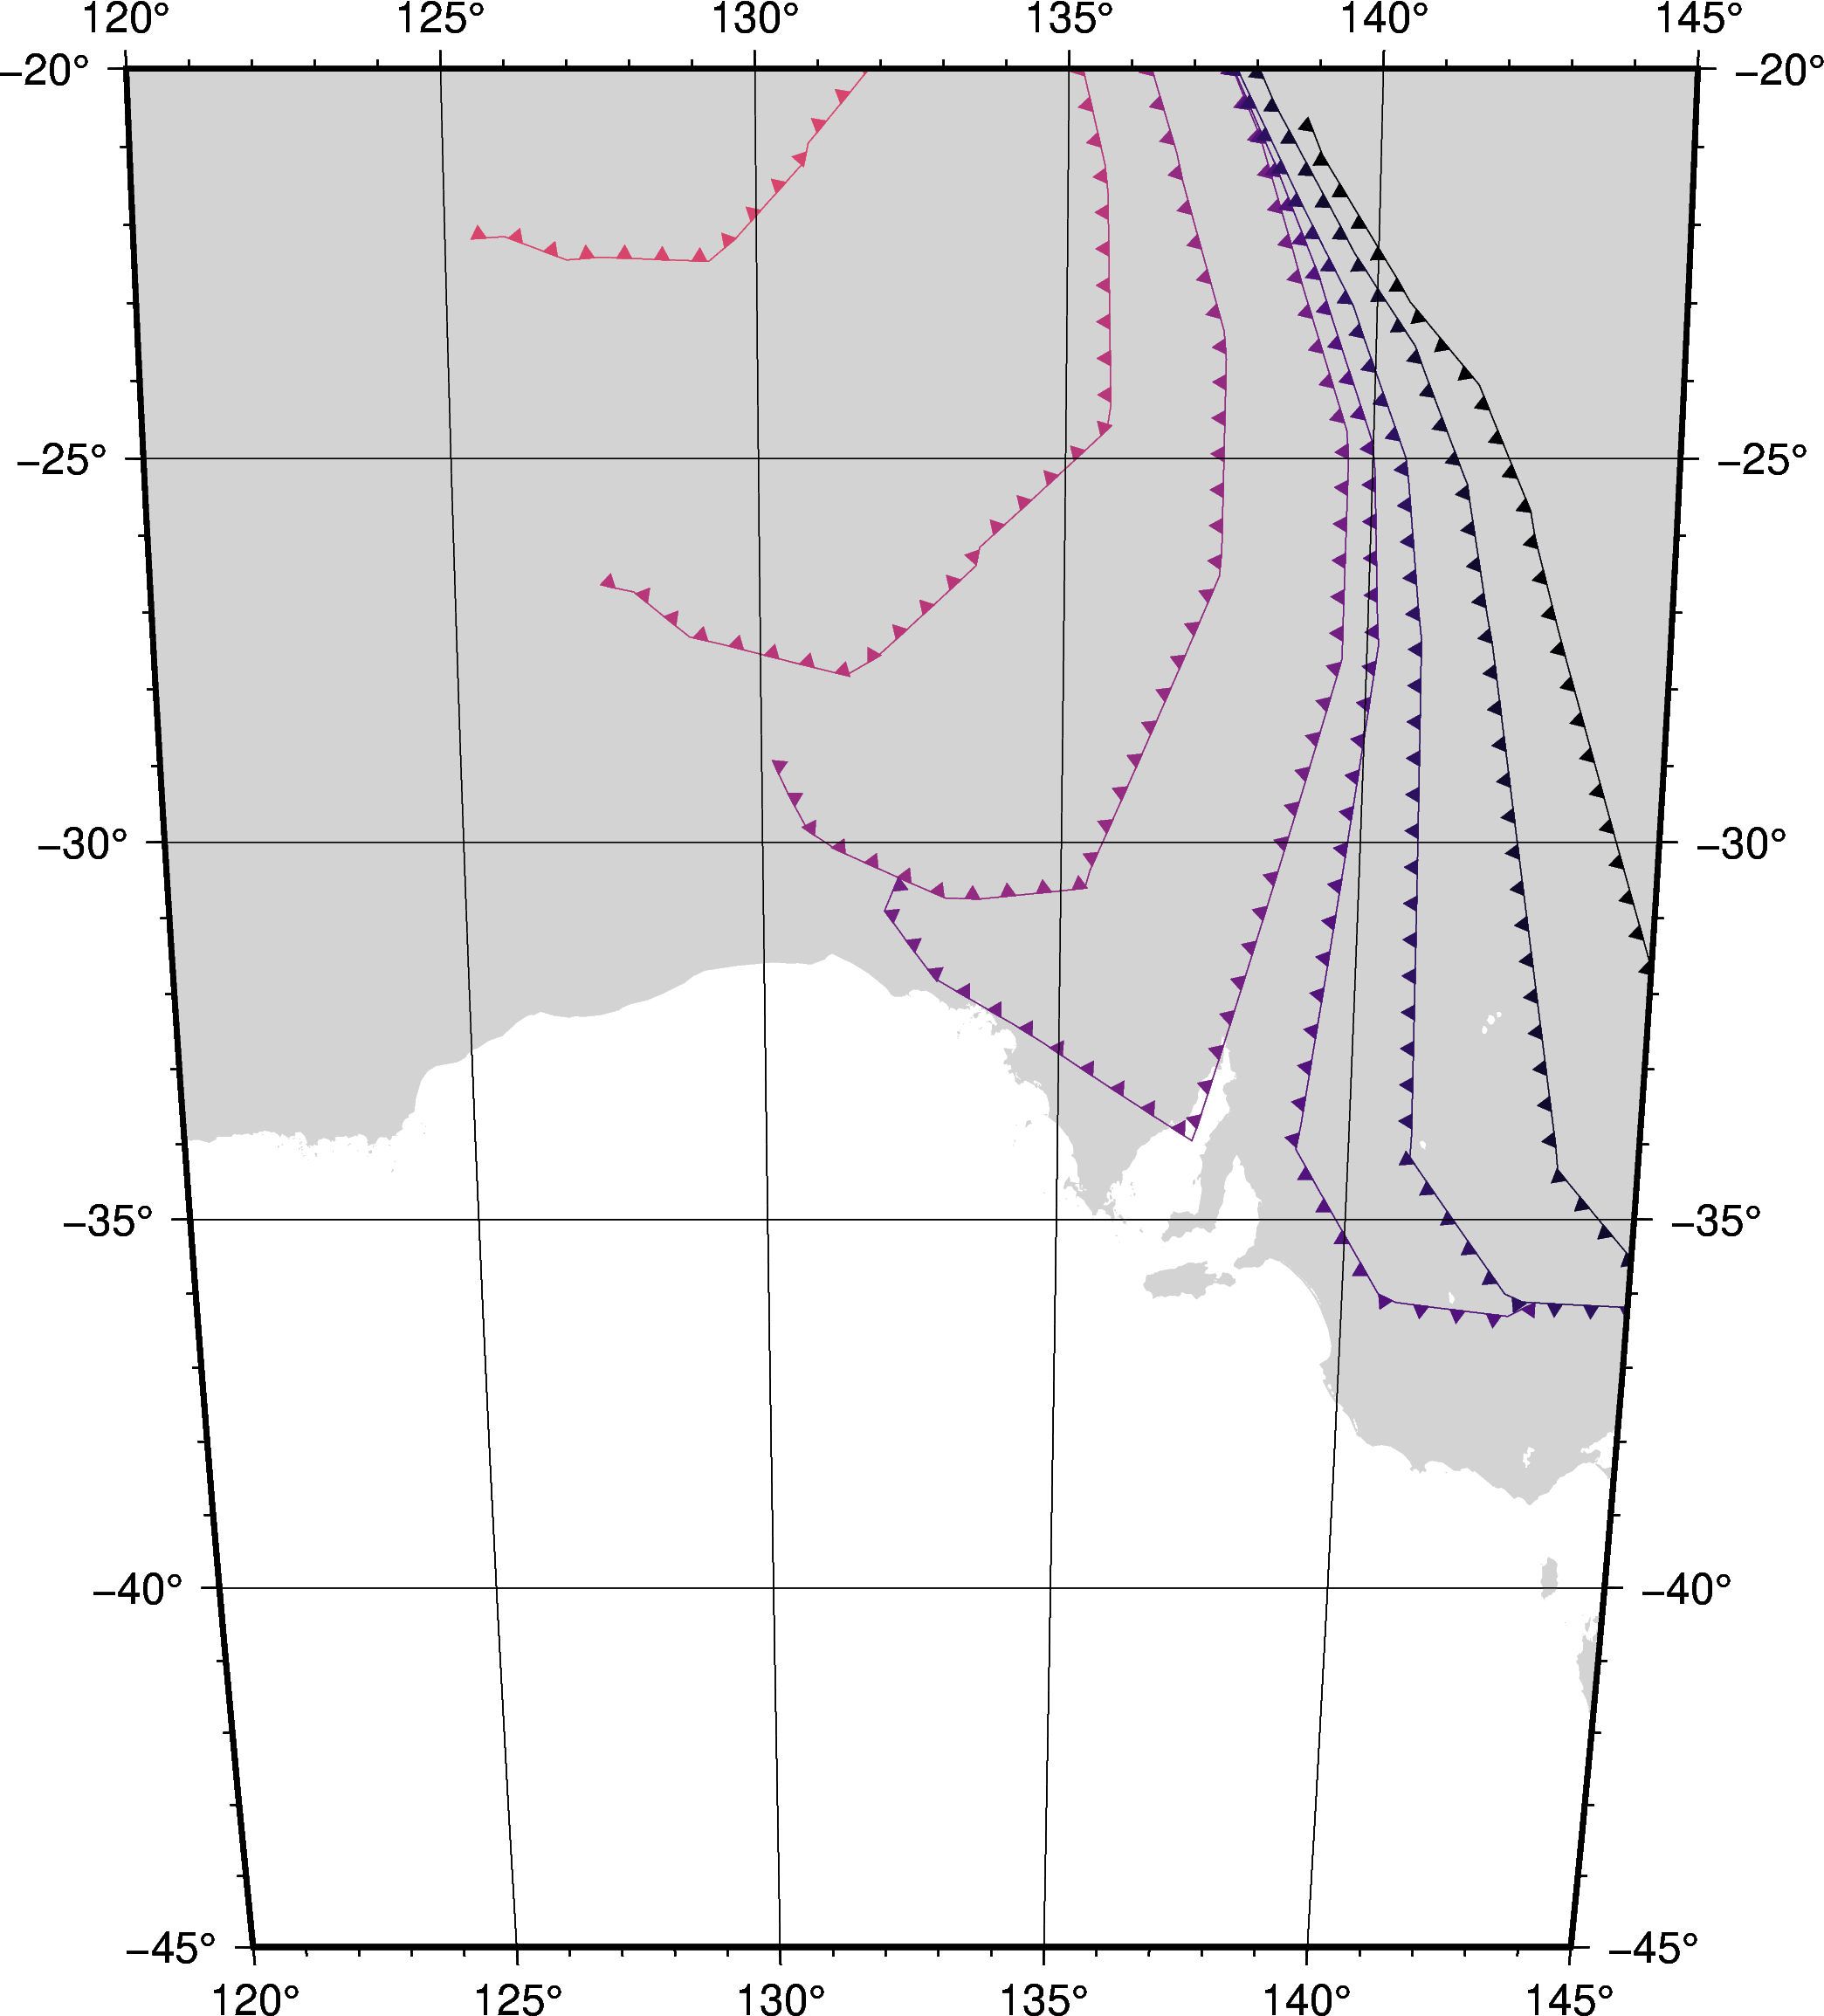

In [9]:
fig = plot_subduction_stack(T2020, 380., 440., 5.)
fig.show(width=800)

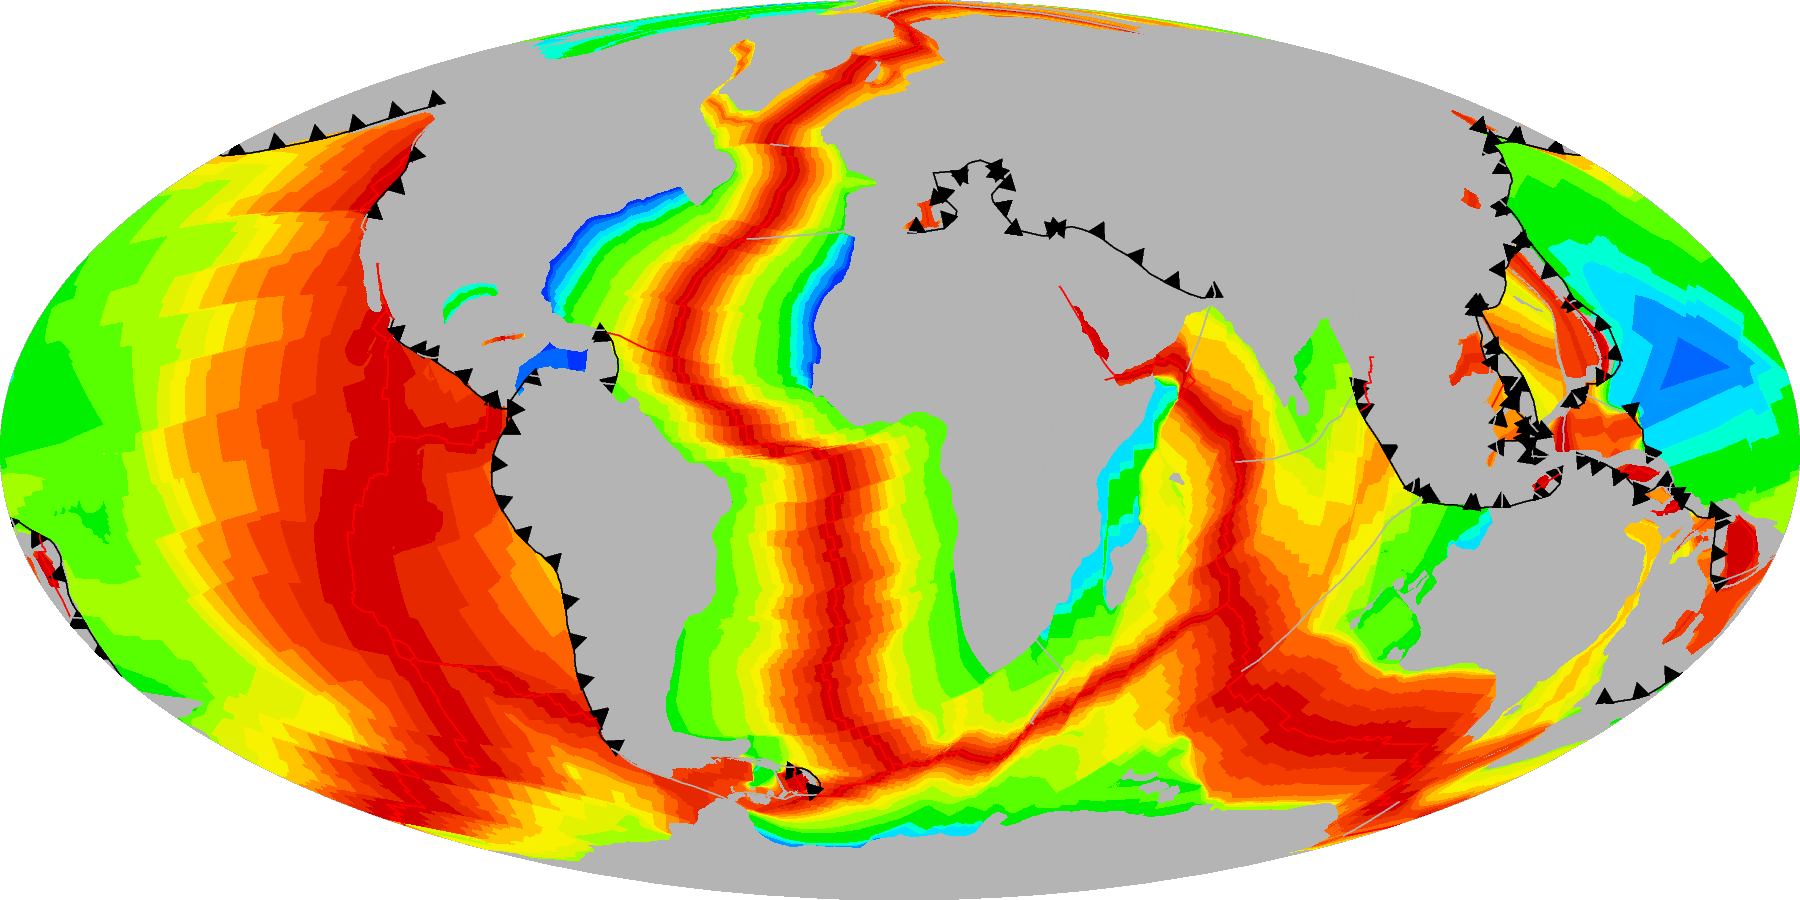

In [22]:
reconstruction_time = 0.
#reconstructed_continents = M2016.polygon_snapshot('continents', reconstruction_time)
reconstructed_plates = M2016.plate_snapshot(reconstruction_time)


fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')

#pygmt.config(COLOR_FOREGROUND='255/200/128', COLOR_BACKGROUND='black')
#pygmt.makecpt(cmap='copper', series='0/180/10', reverse=True)

#pygmt.config(COLOR_FOREGROUND='white', COLOR_BACKGROUND='black')
#pygmt.makecpt(cmap='hot', series='0/180/10', reverse=True)

#pygmt.config(COLOR_FOREGROUND='240/249/33', COLOR_BACKGROUND='13/8/135')
#pygmt.makecpt(cmap='plasma', series='0/180/10', reverse=True)

#fig.grdimage(grid='/Applications/GPlates-2.2.0/SampleData/Rasters/Seafloor_Age_Grid/EarthByte_AREPS_Muller_etal_2016_AgeGrid.nc', n='b')

fig.grdimage(grid='/Applications/GPlates-2.2.0/SampleData/Rasters/Seafloor_Age_Grid/EarthByte_AREPS_Muller_etal_2016_AgeGrid.nc', n='b', 
             cmap='/Users/simon/GIT/agegrid-dev/plotting/age.cpt')

#reconstructed_continents.plot(fig, fill_color='wheat')
reconstructed_plates.plot_subduction_zones(fig)
reconstructed_plates.plot_mid_ocean_ridges(fig)
reconstructed_plates.plot_other_boundaries(fig)
fig.show(width=800)


In [12]:
7.4*8

59.2